In [14]:
# pip install pandas
# pip install matplotlib
# pip install pyvista
# pip install ipyvtklink

SyntaxError: invalid syntax (553101774.py, line 1)

In [1]:
import os
import pandas as pd
import matplotlib as mpl

# focusing on student system 5, student u1822962b
master_dir = './debriefing data/system 2/U1720205F/'

master_df = pd.DataFrame()
for file in os.listdir(master_dir):
    if file.endswith(".csv") and file[0:3] == "ptn":
        new_col_name = file.split(".")[0]
        each_df = pd.read_csv(master_dir + file, header=None)
        each_df = each_df.abs()
        each_df[new_col_name] = each_df.sum(axis=1)
        master_df = pd.concat([master_df, each_df[new_col_name]], axis=1)


In [2]:
files_without_changes = []
files_with_changes = []

for col_name in master_df:
    col_min = master_df[col_name].min()
    col_max = master_df[col_name].max()
    
    if (col_min == col_max):
        files_without_changes.append(col_name)
    else:
        files_with_changes.append(col_name)


<AxesSubplot: >

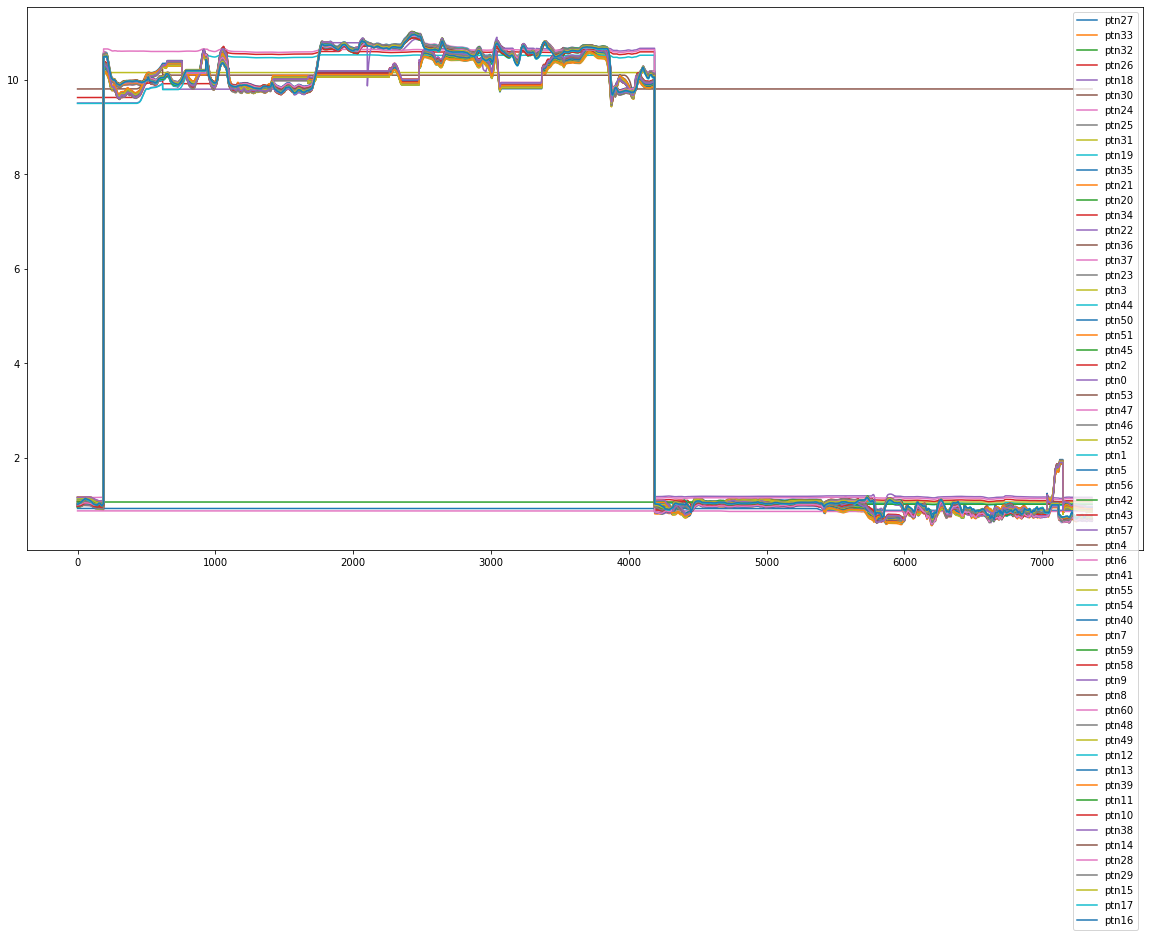

In [3]:
master_df_with_changes = master_df[files_with_changes]
master_df_with_changes.head()
master_df_with_changes.plot(kind='line', figsize=(20, 10))

In [9]:
print("These files has no changes:\n", files_without_changes)

# RTN 0,1,2,5 and 59 are the only files that exhibit changes. 
# We observe that RTN 5, 59 has little changes whereas RTN 0, 1 and 2 have extreme fluctuations.


These files has no changes:
 []


In [31]:
# getting 3d stl files

import pyvista as pv

# focus on ptn43 because there are quite a bit of changes
U1720205F_ptn43_stl_folder = "./U1720205F_PTN43_STL/"
ptn43_file = "ptn43.csv"
ptn43_file_df = pd.read_csv(master_dir + ptn43_file, header=None)

each_sub_plot = []
for i, row in ptn43_file_df.iterrows():
    if i!=0 and i % 10 == 0:
        point_cloud = pv.PolyData(each_sub_plot)
        file_name = "mesh-" + str(int(i/10)) + ".stl"
        point_cloud.save(U1720205F_ptn43_stl_folder + file_name)
        each_sub_plot = []
    else:
        each_sub_plot.append(row)
    


In [8]:
# visualise ptn43 in 3D
import pyvista as pv

point_cloud = pv.PolyData(ptn43_file_df)
point_cloud.plot(render_points_as_spheres=True)


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)